# Set up and process metadata

In [2]:
import csv
import numpy as np
from dataclasses import dataclass
from sys import argv
import pandas as pd

@dataclass
class tax_result:
    species: str
    genus: str
    abund: float
    seq_abund: float

def read_sylph(file_path):
    df = pd.read_csv(file_path, sep='\t')
    df['Sample_file'] = df['Sample_file'].apply(lambda x: x.split('/')[-1].split('_1')[0])
    #df.set_index('Sample_file', inplace=True)
    return df


In [28]:
df_hum_all = read_sylph('real_profiles/human_sylph_results-big.tsv')
df_hum_refseq = read_sylph('real_profiles/human_sylph_results-refseq.tsv')

df_env_all = read_sylph('real_profiles/env_sylph_results-big.tsv')
df_env_refseq = read_sylph('real_profiles/env_sylph_results-refseq.tsv')

df_wallen_all  = read_sylph('real_profiles/wallen_profile.tsv')
df_wallen_refseq = read_sylph('real_profiles/wallen_profile_refseq.tsv')

df_wallen_all['Label'] = 'Gut'
df_wallen_refseq['Label'] = 'Gut'
print(df_hum_all)

df_all = pd.concat([df_hum_all, df_env_all, df_wallen_all])
df_refseq = pd.concat([df_hum_refseq, df_env_refseq, df_wallen_refseq])

with open('real_profiles/oral_samples.txt', 'r') as f:
    oral_samples = f.read().splitlines()
with open('real_profiles/gut_samples.txt', 'r') as f:
    gut_samples = f.read().splitlines()    
with open('real_profiles/skin_samples.txt', 'r') as f:
    skin_samples = f.read().splitlines()
with open('real_profiles/water_sra.txt', 'r') as f:
    water_samples = f.read().splitlines()
with open('real_profiles/sediment_sra.txt', 'r') as f:
    sediment_samples = f.read().splitlines()
with open('real_profiles/sludge_sra.txt', 'r') as f:
    sludge_samples = f.read().splitlines()
with open('real_profiles/soil_sra.txt', 'r') as f:
    soil_samples = f.read().splitlines()
    
slens = {'Oral':len(oral_samples), 'Gut':len(gut_samples),
         'Skin': len(skin_samples), 'Sediment': len(sediment_samples),
        'Sludge': len(sludge_samples), 'Soil': len(soil_samples)}
    
df_all.loc[df_all['Sample_file'].isin(oral_samples), 'Label'] = 'Oral'
#df_all.loc[df_all['Sample_file'].isin(gut_samples), 'Label'] = 'Gut'
df_all.loc[df_all['Sample_file'].isin(skin_samples), 'Label'] = 'Skin'
#df_all.loc[df_all['Sample_file'].isin(water_samples), 'Label'] = 'Terrestial'
df_all.loc[df_all['Sample_file'].isin(sediment_samples), 'Label'] = 'Terrestial'
df_all.loc[df_all['Sample_file'].isin(sludge_samples), 'Label'] = 'Terrestial'
df_all.loc[df_all['Sample_file'].isin(soil_samples), 'Label'] = 'Terrestial'

       Sample_file                                        Genome_file  \
0       ERR4605138                                     imgvr_reps.fna   
1       ERR4605138  gtdb_genomes_reps_r214/database/GCF/006/151/78...   
2       ERR4605138                                     imgvr_reps.fna   
3       ERR4605138  gtdb_genomes_reps_r214/database/GCF/000/219/60...   
4       ERR4605138                                     imgvr_reps.fna   
...            ...                                                ...   
21929  SRR15463406                                     imgvr_reps.fna   
21930  SRR15463406                                     imgvr_reps.fna   
21931  SRR15463406                                     imgvr_reps.fna   
21932  SRR15463406  gtdb_genomes_reps_r214/database/GCA/916/439/11...   
21933  SRR15463406                                     imgvr_reps.fna   

       Taxonomic_abundance  Sequence_abundance  Adjusted_ANI  Eff_cov  \
0                  52.4934              0.5305    

In [29]:
df_refseq.loc[df_refseq['Sample_file'].isin(oral_samples), 'Label'] = 'Oral'
#df_refseq.loc[df_refseq['Sample_file'].isin(gut_samples), 'Label'] = 'Gut'
df_refseq.loc[df_refseq['Sample_file'].isin(skin_samples), 'Label'] = 'Skin'
#df_refseq.loc[df_refseq['Sample_file'].isin(water_samples), 'Label'] = 'Terrestial'
df_refseq.loc[df_refseq['Sample_file'].isin(sediment_samples), 'Label'] = 'Terrestial'
df_refseq.loc[df_refseq['Sample_file'].isin(sludge_samples), 'Label'] = 'Terrestial'
df_refseq.loc[df_refseq['Sample_file'].isin(soil_samples), 'Label'] = 'Terrestial'


{'Gut': [57, 60, 75, 75, 83, 89, 90, 66, 88, 57, 86, 66, 113, 85, 98, 94, 62, 86, 66, 129, 75, 81, 75, 77, 105, 85, 98, 81, 97, 118, 72, 104, 63, 91, 90, 115, 95, 133, 106, 71, 141, 103, 100, 88, 75, 113, 42, 95, 109, 77, 54, 83, 72, 100, 79, 78, 88, 48, 77, 95, 46, 65, 49, 87, 107, 57, 54, 73, 59, 45, 47, 64, 60, 62, 88, 67, 59, 99, 109, 96, 81, 94, 97, 92, 111, 121, 110, 119, 59, 111, 57, 76, 63, 103, 55, 69, 96, 101, 90, 135, 82, 94, 76, 87, 82, 116, 103, 100, 102, 121, 66, 106, 43, 81, 97, 94, 98, 77, 72, 88, 77, 68, 84, 83, 69, 93, 86, 87, 99, 81, 67, 76, 101, 83, 90, 98, 90, 51, 63, 67, 74, 84, 71, 63, 54, 62, 73, 82, 97, 87, 97, 70, 63, 84, 42, 87, 84, 75, 67, 79, 97, 89, 122, 77, 81, 91, 144, 81, 125, 105, 53, 64, 100, 83, 61, 106, 78, 70, 103, 85, 66, 65, 54, 90, 79, 67, 121, 74, 62, 81, 97, 75, 66, 63, 71, 77, 96, 105, 94, 68, 56, 66, 79, 83, 81, 62, 92, 89, 94, 88, 114, 58, 98, 75, 95, 101, 103, 101, 81, 104, 82, 85, 96, 74, 82, 70, 89, 107, 99, 82, 129, 74, 75, 71, 87, 83, 

/home/jimshawster/mambaforge/envs/taxprof/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jimshawster/mambaforge/envs/taxprof/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jimshawster/mambaforge/envs/taxprof/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jimshawster/mambaforge/envs/taxprof/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

{'Gut': [7, 10, 4, 2, 6, 9, 8, 4, 4, 2, 5, 10, 8, 7, 12, 2, 5, 7, 5, 4, 6, 5, 1, 2, 9, 3, 4, 6, 6, 15, 4, 8, 4, 3, 8, 9, 2, 6, 4, 4, 13, 6, 6, 4, 8, 10, 9, 3, 3, 3, 7, 2, 6, 4, 5, 6, 3, 3, 6, 3, 5, 4, 2, 3, 2, 4, 3, 4, 6, 2, 2, 5, 4, 5, 7, 11, 8, 2, 4, 8, 3, 13, 7, 10, 9, 5, 9, 2, 3, 6, 3, 7, 6, 6, 7, 10, 5, 12, 2, 9, 7, 10, 7, 12, 1, 8, 4, 4, 3, 2, 8, 2, 3, 6, 7, 5, 6, 7, 6, 4, 3, 10, 2, 9, 7, 4, 3, 3, 4, 5, 4, 6, 8, 2, 7, 5, 6, 3, 5, 6, 4, 5, 4, 8, 4, 8, 2, 3, 6, 2, 10, 9, 7, 9, 6, 5, 6, 10, 5, 6, 3, 2, 8, 10, 4, 3, 4, 3, 7, 6, 6, 6, 7, 14, 14, 10, 3, 2, 3, 12, 7, 5, 3, 1, 4, 2, 5, 7, 6, 7, 5, 5, 12, 5, 5, 8, 2, 4, 5, 1, 6, 3, 10, 6, 7, 5, 2, 2, 3, 2, 7, 3, 9, 4, 7, 10, 3, 5, 6, 6, 5, 2, 7, 9, 2, 4, 7, 6, 2, 3, 4, 2, 8, 5, 4, 1, 7, 3, 7, 4, 1, 2, 5, 5, 6, 8, 1, 1, 1, 6, 3, 1, 5, 3, 3, 3, 1, 2, 10, 5, 3, 5, 8, 1, 6, 9, 4, 4, 5, 7, 8, 14, 3, 8, 6, 11, 6, 4, 3, 4, 3, 6, 6, 7, 6, 9, 4, 5, 5, 2, 3, 8, 5, 6, 6, 12, 12, 4, 3, 6, 9, 3, 1, 8, 7, 5, 11, 3, 5, 6, 2, 4, 9, 7, 1, 3, 5, 5, 5, 7, 4

/home/jimshawster/mambaforge/envs/taxprof/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jimshawster/mambaforge/envs/taxprof/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jimshawster/mambaforge/envs/taxprof/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jimshawster/mambaforge/envs/taxprof/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

<Figure size 640x480 with 0 Axes>

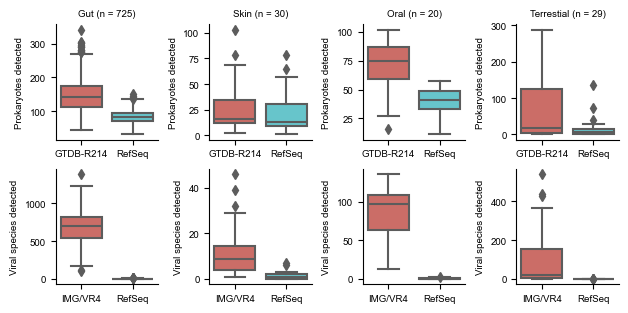

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = 1/2.54  # centimeters in inches\n",
cmap = sns.color_palette("muted")
plt.rcParams.update({'font.size': 7})
plt.rcParams.update({'figure.autolayout': True})
plt.rcParams.update({'font.family':'arial'})
plt.subplots_adjust(hspace=0.4)

# Define the test setups and metrics
titles = ['Gut', 'Skin', 'Oral', 'Terrestial']
fig, axes = plt.subplots(2, len(titles), figsize=(16* cm, 8 * cm), sharey=False)


for j in range(2):
    if j == 0:
        df = df_all[df_all['Genome_file'].str.contains('gtdb')]
        df_r = pd.concat([
            df_refseq[df_refseq['Genome_file'].str.contains('bacteria')],
            df_refseq[df_refseq['Genome_file'].str.contains('archaea')]])

    else:
        df = df_all[df_all['Genome_file'].str.contains('imgvr')]
        df_r = df_refseq[df_refseq['Genome_file'].str.contains('viral')]        
    # Create a dictionary to store arrays of sizes for each label
    boxplot_data = {}
    boxplot_data_r = {}

    grouped = df.groupby(['Label', 'Sample_file']).size().reset_index(name='Counts')
    grouped_r = df_r.groupby(['Label', 'Sample_file']).size().reset_index(name='Counts')
    
    for label, group in grouped.groupby('Label'):
        boxplot_data[label] = group['Counts'].tolist()
    for label, group in grouped_r.groupby('Label'):
        boxplot_data_r[label] = group['Counts'].tolist()
        

    for label, data in boxplot_data_r.items():
        for k in range(len(data),len(boxplot_data[label])):
            data.append(0)
    
    for label in boxplot_data.keys():
        if label not in boxplot_data_r:
            boxplot_data_r[label] = np.zeros(len(boxplot_data[label]))
    
    
    #print(boxplot_data,j)
    print(boxplot_data_r,j)
    for (i, label) in enumerate(titles):
        ax = axes[j, i]
        #print(label)
        #print(boxplot_data[label])
        if j == 0:
            data = {"GTDB-R214" : boxplot_data[label], "RefSeq" : boxplot_data_r[label]}
                # Convert dictionary to DataFrame
        else:
            data = {"IMG/VR4" : boxplot_data[label], "RefSeq" : boxplot_data_r[label]}
                # Convert dictionary to DataFrame
        df = pd.DataFrame.from_dict(data, orient='index').transpose()
        if j == 0:
            y = "Prokaryotes detected"
        else:
            y = "Viral species detected"
        df_melted = df.melt(var_name='Category', value_name=y)
        # Create the boxplot with smaller width
        sns.boxplot(x = 'Category', y = y, data=df_melted, ax=ax, palette="hls", width=0.8)
        #ax.set_xticklabels(methods)
        #ax.set_ylabel(metric.capitalize())
        if j == 0:
            t = label + f" (n = {len(boxplot_data[label])})"
            ax.set_title(t, fontsize=7.0)    
        sns.despine(ax=ax)
        ax.set_xlabel('')

        #ax.tick_params(axis='x', rotation=75)
        
    # Add one title per row in the middle
    #fig.text(0.5, y_positions[i], setup, ha="center", va="center", fontsize=9)

# Show the grid of plots
plt.tight_layout()
plt.savefig('figures/real_profiling_gtdbvsrefseq.svg')
plt.show()

In [55]:
import csv
import numpy as np
from dataclasses import dataclass
from sys import argv

@dataclass
class tax_result:
    species: str
    genus: str
    abund: float
    seq_abund: float

def truth(file_path, spec90 = False):
    taxonomic_data = dict()
    results = []
    with open(file_path, 'r') as f:
        csv_reader = csv.reader(f, delimiter='\t')
        for row in csv_reader:
            spl = row
            spec = spl[0]
            seq_abund = float(spl[1])
            data = tax_result(spl[0], "", 0, seq_abund)
            if spec90:
                if len(results) >= 50:
                    break
            results.append(data)
            
    total_seq = 0
    for r in results:
        total_seq += r.seq_abund
    for r in results:
        #r.seq_abund = r.seq_abund / total_seq
        if r.species in taxonomic_data:
            #print(r.species)
            taxonomic_data[r.species].seq_abund += r.seq_abund 
        else:
            taxonomic_data[r.species] = r

    return taxonomic_data

def read_sylph(file_path):
    sample_to_taxonomic_data = dict()
    with open(file_path, 'r') as f:
        csv_reader = csv.DictReader(f, delimiter='\t')
        for row in csv_reader:
            spl = row
            query = row['Sample_file'].split('/')[-1].split('_')
            diff = int(query[0][-2:])
            it = int(query[1])
            if (diff,it) in sample_to_taxonomic_data:
                taxonomic_data = sample_to_taxonomic_data[(diff,it)]
            else:
                taxonomic_data = {}
                sample_to_taxonomic_data[(diff,it)] = taxonomic_data
            ref = row['Contig_name'].rstrip()
            r = tax_result(ref,"", float(row['Taxonomic_abundance'])/100, float(row['Sequence_abundance'])/100)
            taxonomic_data[ref] = r
    return sample_to_taxonomic_data

def compare_to_truth(res, truth, debug = False):
    tp = 0
    fp = 0
    num_true = len(truth)
    num_pred = len(res)
    seq_abund_vec_res = []
    seq_abund_vec_truth = []
    
    for spec, data in truth.items():
        seq_abund_vec_truth.append(data.seq_abund)
        if spec in res:
            if debug:
                print('FOUND', truth[spec], res[spec])
            seq_abund_vec_res.append(res[spec].seq_abund)
            tp += 1
        else:
            if debug:
                print('NONE', spec, data)
            seq_abund_vec_res.append(0)
            #fp += 1
    for spec, data in res.items():
        if spec not in truth:
            if debug:
                print('NOT IN TRUTH', data)
            fp += 1
            seq_abund_vec_res.append(res[spec].seq_abund)
            seq_abund_vec_truth.append(0)

    #seq_abund_vec_truth = seq_abund_vec_truth / np.linalg.norm(seq_abund_vec_truth,1)
    #seq_abund_vec_res = seq_abund_vec_res / np.linalg.norm(seq_abund_vec_res,1)
    #genus_seq_abund_vec_truth = genus_seq_abund_vec_truth / np.linalg.norm(genus_seq_abund_vec_truth, 1)
    #genus_seq_abund_vec_res = genus_seq_abund_vec_res / np.linalg.norm(genus_seq_abund_vec_res,1)


    norm_seq_truth = seq_abund_vec_truth / np.linalg.norm(seq_abund_vec_truth,1)
    norm_seq_res = seq_abund_vec_res / np.linalg.norm(seq_abund_vec_res,1)
    
    l1_seqabund = np.sum(np.abs(np.array(seq_abund_vec_res) - np.array(seq_abund_vec_truth)))

    l1_seqabund_species = (np.sum(np.abs(np.array(norm_seq_truth) - np.array(norm_seq_res))))

    sensitivity = tp/num_true
    precision = 1 - fp/num_pred

    print('---------------')
    print("l1 seq,  sens, prec, number_of_predicted, num correct")
    f1 = 2 / (1 / sensitivity + 1 / precision)
    print(l1_seqabund,  sensitivity, precision, num_pred, tp)
    return({"F1":f1, "l1":l1_seqabund, "Sensitivity": sensitivity, "Precision": precision,
            "num_pred": num_pred, "tp": tp,  "l1_constrain": l1_seqabund_species})


In [56]:
sylph_results = read_sylph('./virus/vir_results.tsv')
sylph_stats = []

exps = [95]
its = range(0,11)

#exps = [98]
#its = [5,7]
for (i,diff) in enumerate(exps):
    for it in its:
        files = [f'./virus/species{diff}_{it}.tsv',
               'sylph',
              ]
        if diff == 90:
            truth_data = truth(files[0], spec90 = True)
            truth_data_all = truth(files[0], spec90=False)
        else:
            truth_data = truth(files[0])
        # Test the functions
        results = files[1:]
        
        out = ""
        print(it,diff)
        for result in results:
            if 'ganon' in result:
                results = read_ganon_file(result, species_name_to_spec, spec_to_metadata)
            elif 'sylph' in result:
                results = sylph_results[(diff,it)]
                
            debug = False

            stats = compare_to_truth(results, truth_data, debug)
            sylph_stats.append(stats)


0 95
---------------
l1 seq,  sens, prec, number_of_predicted, num correct
0.2271387707891051 0.6756756756756757 0.9259259259259259 27 25
1 95
---------------
l1 seq,  sens, prec, number_of_predicted, num correct
0.4495358402017753 0.7352941176470589 1.0 25 25
2 95
---------------
l1 seq,  sens, prec, number_of_predicted, num correct
0.25987652442189235 0.6666666666666666 0.9565217391304348 23 22
3 95
---------------
l1 seq,  sens, prec, number_of_predicted, num correct
0.3419667101593056 0.7894736842105263 1.0 30 30
4 95
---------------
l1 seq,  sens, prec, number_of_predicted, num correct
0.40321349399189693 0.6896551724137931 1.0 20 20
5 95
---------------
l1 seq,  sens, prec, number_of_predicted, num correct
0.161408391556575 0.6666666666666666 1.0 22 22
6 95
---------------
l1 seq,  sens, prec, number_of_predicted, num correct
0.1888709972886751 0.78125 1.0 25 25
7 95
---------------
l1 seq,  sens, prec, number_of_predicted, num correct
0.29911744610416985 0.7647058823529411 0.928

NameError: name 'sylph_stats' is not defined

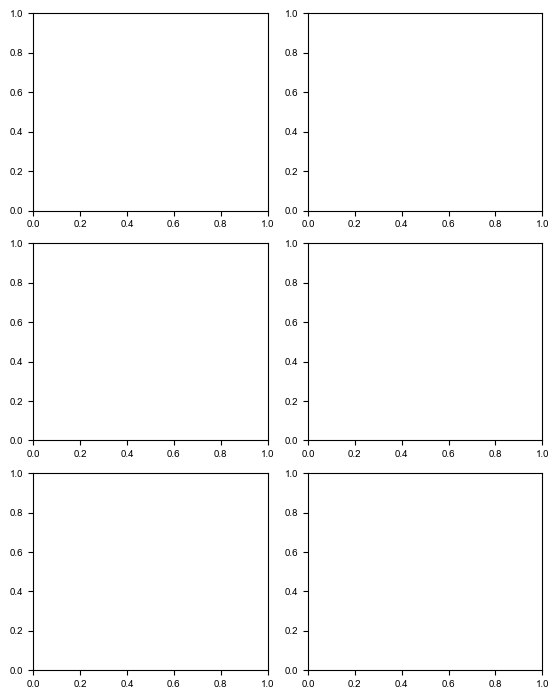

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plot aesthetics
plt.rcParams.update({'font.size': 7})
plt.rcParams.update({'figure.autolayout': True})
plt.rcParams.update({'font.family': 'arial'})

# Create the 1-row, 3-column subplot layout
fig, axes = plt.subplots(3, 2, figsize=(7 * 2/3 * 1.2, 7), sharey=False)
plt.subplots_adjust(hspace=0.4)

# Define the test setups
test_setups = ["95-97.5% ANI (50 genomes) + \n85-90% ANI (150 genomes; not present at species-level)", 
               "95-97.5% ANI (200 genomes)",
               "97.5-99.9% ANI (200 genomes)"]

#methods = ['sylph profile', 'KMCP', 'Bracken\n0.01% cutoff']

# Loop through the test setups to fill the grid
for i, setup in enumerate(test_setups):
    #for (j, eval) in enumerate(['l1', 'l1_constrain']):
    for (j, eval) in enumerate(['l1_constrain', 'l1genus']):
        if i == 0:
            methods = ['sylph profile', 'KMCP', 'ganon', 'Bracken\n0.01% cutoff']
            if j == 1:
                stats_l = [[sylph_stats_all,[],[]],
                           [kmcp_stats_all,[],[]], 
                           [ganon_stats_all,[],[]],
                           [kraken_stats_all,[],[]]]
            else:
                stats_l = [sylph_stats, kmcp_stats, ganon_stats, kraken_stats]
        else:
            methods = ['sylph profile', 'KMCP', 'ganon', 'Bracken\n0.01% cutoff', 'MetaPhlAn4*']
            stats_l = [sylph_stats, kmcp_stats, ganon_stats, kraken_stats, metaphlan_stats]
        ax = axes[i][j]
        
        # Extract the data for this subplot
        data_to_plot = []
        for k, method_stats in enumerate(stats_l):
            method_data = [x[eval] for x in method_stats[i]]
            data_to_plot.append(method_data)
        
        # Create the boxplot with smaller width
        sns.boxplot(data=data_to_plot, ax=ax, palette="muted", width=0.8)
        
        # Add labels
        # Two plots: species normalized L1, 
        # Holdout plot: species normalized L1, species true relative L1
        ax.set_xticklabels(methods)
        #if j == 0:
        #    ax.set_title(test_setups[i], fontsize=8.0)
        if j == 1:
            ax.set_ylabel('L1 distance\n(all genus)')
        if j == 0:
            ax.set_ylabel('L1 distance\n(only present species)')
    
        # Remove the top and right borders
        sns.despine(ax=ax)
        ax.tick_params(axis='x', rotation=75)
        
# Show the grid of plots
plt.tight_layout()
plt.savefig('figures/l1_metric_benchmark.svg')
plt.show()




/tmp/ipykernel_26986/3989800060.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,pd.DataFrame([{'Test Setup': setup, 'Method': method, 'Metric': metric, 'Value': value}])], ignore_index=True)
/home/jimshawster/mambaforge/envs/taxprof/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jimshawster/mambaforge/envs/taxprof/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types

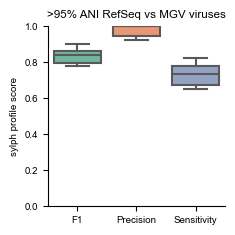

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cm = 1/2.54  # centimeters in inches\n",

# Your configuration remains the same
cmap = sns.color_palette("muted")
plt.rcParams.update({'font.size': 7})
plt.rcParams.update({'figure.autolayout': True})
#plt.rcParams.update({'font.family':'arial'})

# Define the test setups and metrics
test_setups = [""]
metrics = ['F1', 'Precision', 'Sensitivity']
methods = ['sylph profile']

# Create an empty DataFrame
df = pd.DataFrame(columns=['Test Setup', 'Method', 'Metric', 'Value'])

# Populate the DataFrame
for i, setup in enumerate(test_setups):
    for method, method_stats in zip(methods, [sylph_stats]):
        for sample in method_stats:
            for metric in metrics:
                value = sample[metric]
                df = pd.concat([df,pd.DataFrame([{'Test Setup': setup, 'Method': method, 'Metric': metric, 'Value': value}])], ignore_index=True)

# Plotting
fig, ax = plt.subplots( figsize=(6* cm, 6* cm))
sns.boxplot(x="Metric", y="Value",  data=df[df['Test Setup'] == test_setups[i]], palette='Set2')

ax.set_title(test_setups[i], fontsize=8.0)
ax.set_ylabel('sylph profile score')
sns.despine(ax=ax)
ax.set_title(">95% ANI RefSeq vs MGV viruses")
ax.set_ylim([0,1])
ax.set_xlabel("")
#plt.legend(frameon=False)

plt.tight_layout()
plt.savefig('figures/virus_results.svg')
plt.show()

                         method    time
0   GTDB-R214\n(85,205 bac+arc)   85.13
1     IMG/VR4*\n(2,917,521 vir)  186.26
2  RefSeq B+A\n(18,325 bac+arc)   23.38
3    RefSeq viral\n(14,993 vir)    0.70                          method  cpu_time
0   GTDB-R214\n(85,205 bac+arc)   1877.65
1     IMG/VR4*\n(2,917,521 vir)    162.94
2  RefSeq B+A\n(18,325 bac+arc)    547.36
3    RefSeq viral\n(14,993 vir)      4.74                          method     memory
0   GTDB-R214\n(85,205 bac+arc)  13.000099
1     IMG/VR4*\n(2,917,521 vir)   2.999516
2  RefSeq B+A\n(18,325 bac+arc)   4.777359
3    RefSeq viral\n(14,993 vir)   0.130157


/home/jimshawster/mambaforge/envs/taxprof/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jimshawster/mambaforge/envs/taxprof/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jimshawster/mambaforge/envs/taxprof/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jimshawster/mambaforge/envs/taxprof/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

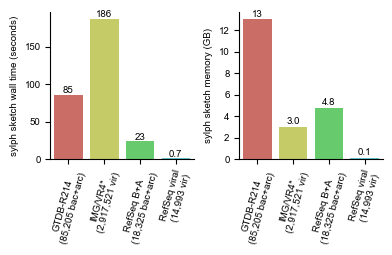

In [58]:
# Initialize empty lists to store data
time_data = []
cpu_time_data = []
memory_data = []

files = ['./times/sketch_gtdb.times', './times/sketch_imgvr.times', './times/sketch_refseq_bacteria+archaea.times', './times/sketch_refseq_viruse.times']
method_names = ['GTDB-R214\n(85,205 bac+arc)', 'IMG/VR4*\n(2,917,521 vir)', 'RefSeq B+A\n(18,325 bac+arc)', 'RefSeq viral\n(14,993 vir)']

import re
plt.rcParams.update({'font.size': 7})

def parse_performance_stats(file, method):
    text = open(file,'r').readlines()[0]
    # Regular expressions for matching relevant data
    wall_time_pattern = r"(\d+):(\d+\.\d+)elapsed"
    user_time_pattern = r"(\d+\.\d+)user"
    system_time_pattern = r"(\d+\.\d+)system"
    max_resident_pattern = r"(\d+)maxresident\)k"

    # Extract wall time
    wall_time_match = re.search(wall_time_pattern, text)
    if wall_time_match:
        minutes, seconds = map(float, wall_time_match.groups())
        wall_time = minutes * 60 + seconds
    else:
        wall_time = None

    # Extract user and system time
    user_time_match = re.search(user_time_pattern, text)
    system_time_match = re.search(system_time_pattern, text)
    if user_time_match and system_time_match:
        user_time = float(user_time_match.group(1))
        system_time = float(system_time_match.group(1))
        cpu_time = user_time + system_time
    else:
        cpu_time = None

    # Extract maximum resident memory
    max_resident_match = re.search(max_resident_pattern, text)
    if max_resident_match:
        max_resident_kb = float(max_resident_match.group(1))
        max_resident_gb = max_resident_kb / (1024 * 1024)
    else:
        max_resident_gb = None

    time_data.append({'method': method, 'time': wall_time})
    cpu_time_data.append({'method': method, 'cpu_time': cpu_time})
    memory_data.append({'method': method, 'memory': max_resident_gb})

for i,file in enumerate(files):
    parse_performance_stats(file, method_names[i])
    
# Convert lists of dictionaries to DataFrames
time_df = pd.DataFrame(time_data)
cpu_time_df = pd.DataFrame(cpu_time_data)
memory_df = pd.DataFrame(memory_data)

print(time_df, cpu_time_df, memory_df)

fig, axes = plt.subplots(1, 2, figsize=(10* cm, 7 * cm))
palette = sns.color_palette("hls")
#ordered_labels = ['sylph profile',  'KMCP', 'ganon','Bracken', 'MetaPhlAn4']#, 'motus']
# Plot the wall time, CPU time and memory
ax1 = sns.barplot(y='time', x='method', data=time_df, estimator=lambda x: sum(x)/len(x), ax=axes[0], palette=palette )
#ax2 = sns.barplot(y='cpu_time', x='method',  data=cpu_time_df, estimator=lambda x: sum(x)/len(x), ax=axes[0], palette=palette )
ax3 = sns.barplot(x='method', y='memory', data=memory_df, estimator=max, ax=axes[1], palette=palette)

ax1.set(xlabel='', ylabel= 'sylph sketch wall time (seconds)')
#ax2.set(xlabel='', ylabel='sylph sketch CPU time (s)')
ax3.set(xlabel='', ylabel='sylph sketch memory (GB)')

# Add titles and remove top and right borders
titles = ['Mean wall Time (s)', 'Mean CPU Time (s)', 'Indexing memory (GB)']
for ax, title in zip(axes, titles):
    #ax.set_title(title)
    sns.despine(ax=ax)

# Annotate bars with integers
for (k,ax) in enumerate(axes):
    for p in ax.patches:
        if p.get_height() < 10:
            test = round(p.get_height(),1)
        else:
            test = round(p.get_height())
        ax.annotate(f'{test}', (p.get_x() + p.get_width() / 2., p.get_height() + 0.05 ),
                ha='center', va='bottom')

    ax.tick_params(axis='x', rotation=75)

#plt.suptitle('Performance Metrics Across All Methods, Samples, and Experiments')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('figures/database_sketching_time.svg')
plt.show()

